# **Image Classification of Omnivores and Herbivores using the CIFAR-100 Dataset**

This project aims to classify images into two categories: omnivores and herbivores, utilizing the CIFAR-100 dataset. The CIFAR-100 dataset contains 60,000 32x32 color images in 100 classes, with each class containing 600 images. Here, we focus on distinguishing between animals that primarily consume plants (herbivores) and those that consume both plants and animals (omnivores). Through deep learning techniques and convolutional neural networks (CNNs), we seek to build a model capable of accurate classification among diverse species.


## **Import modules**

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
from tensorflow.keras import layers
import keras_cv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

C:\Users\Desktop PC\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Import the dataset**

In [2]:
(X_coarse_train, y_coarse_train), (X_coarse_test, y_coarse_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='coarse'
)

(X_fine_train, y_fine_train), (X_fine_test, y_fine_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

## **Data Preprocessing**
We will be extracting only the `large omnivores and herbivores` coarse class from the dataset along with their fine classes.

In [3]:
# Extracting images from coarse dataset

coarse_train_index = (y_coarse_train == 11).reshape(X_coarse_train.shape[0]) # Returns the indices where y_coarse_train == 11
X_train = X_coarse_train[coarse_train_index] # Extracts the images from X_train with indices that match the class

coarse_test_index = (y_coarse_test == 11).reshape(X_coarse_test.shape[0])
X_test = X_coarse_test[coarse_test_index]

In [4]:
# Extracting index of fine labels

labels_of_herbi_omni = []
label_mapping = {}

str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
              'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
              'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
              'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
              'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
              'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
herbi_omni = ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
print("Fine labels of Herbivores and Omnivores:")
for i, name in enumerate(str_labels):
  if name in herbi_omni:
    print(f"{i}: {name}")
    label_mapping[i] = herbi_omni.index(name)
    labels_of_herbi_omni.append(i)

Fine labels of Herbivores and Omnivores:
15: camel
19: cattle
21: chimpanzee
31: elephant
38: kangaroo


In [5]:
# Extracting fine labels of images from coarse indices

fine_train_index = np.isin(y_fine_train, labels_of_herbi_omni).reshape(X_fine_train.shape[0])
y_train = y_fine_train[fine_train_index]

fine_test_index = np.isin(y_fine_test, labels_of_herbi_omni).reshape(X_fine_test.shape[0])
y_test = y_fine_test[fine_test_index]

In [6]:
# Convert fine labels from their original numbers to arbitrary categorical numbers from 0 - 4

y_train = np.array([label_mapping[label[0]] for label in y_train]).reshape(-1, 1)
y_test = np.array([label_mapping[label[0]] for label in y_test]).reshape(-1, 1)

# Convert training and test labels to categorical variables. This does one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [7]:
def count_samples():
  # Count samples per class in training set
  train_counts = {label: np.sum(np.argmax(y_train, axis=1) == label) for label in range(y_train.shape[1])}

  # Count samples per class in testing set
  test_counts = {label: np.sum(np.argmax(y_test, axis=1) == label) for label in range(y_test.shape[1])}

  print("\nNumber of samples per class in training set: ")
  for label, count in train_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")

  print("\nNumber of samples per class in testing set: ")
  for label, count in test_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")


  print(f"\nTotal number of training samples: {sum(train_counts.values())}")
  print(f"Total number of test samples: {sum(test_counts.values())}")

count_samples()


Number of samples per class in training set: 
camel (0): 500
cattle (1): 500
chimpanzee (2): 500
elephant (3): 500
kangaroo (4): 500

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 2500
Total number of test samples: 500


In [8]:
# Normalize the pixels of the images from 0 to 1

X_train = X_train / 255
X_test = X_test / 255

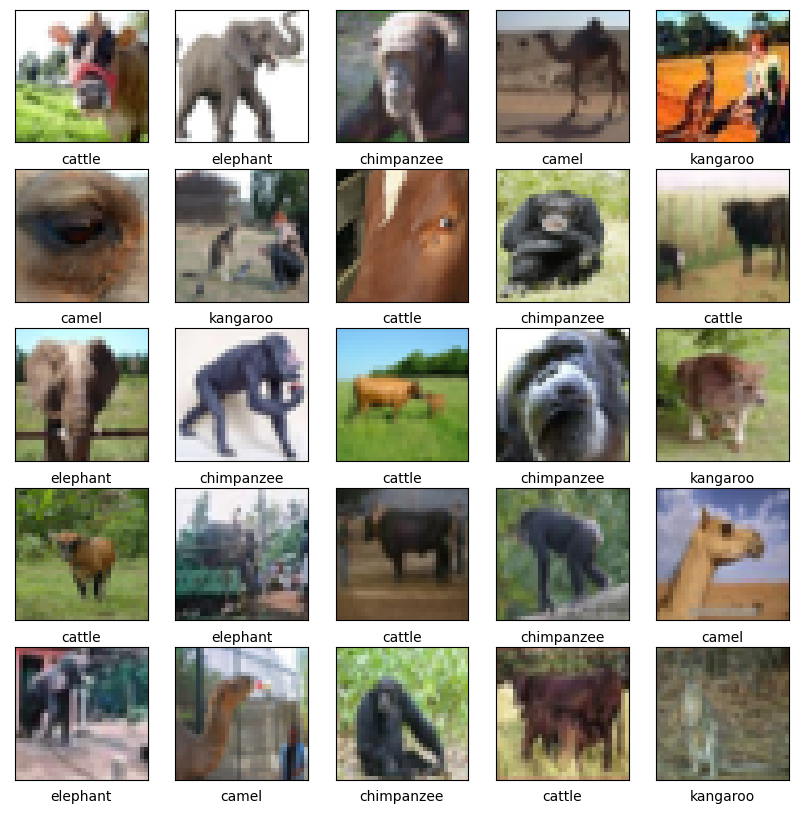

In [9]:
# Display 25 sample images with labels
def view_samples():
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X_train[i], cmap=plt.cm.binary)
      plt.xlabel(herbi_omni[np.argmax(y_train[i])])
  plt.show()

view_samples()

## **Data Augmentation**
The dataset is too small for accurate image processing. According to Picsellia (2022), for a dataset to be adequate in size for image classification, around 1000 images per class is needed.

In [10]:
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 1),
    augmentations_per_image=3,
    magnitude=0.3,
    magnitude_stddev=0.2,
    rate=1.0,
)

# Initialize lists to store augmented images and labels
augmented_training_set = []
augmented_labels = []

# Apply data augmentation to each image multiple times
for image, label in zip(X_train, y_train):
  augmented_image = rand_augment(image)
  augmented_training_set.append(augmented_image)
  augmented_labels.append(label)

augmented_training_set = np.array(augmented_training_set)
augmented_labels = np.array(augmented_labels)

In [11]:
augmented_training_set.shape

(2500, 32, 32, 3)

There are 5000 new images generated from the augmented training set. Below are some examples of the augmentations done.

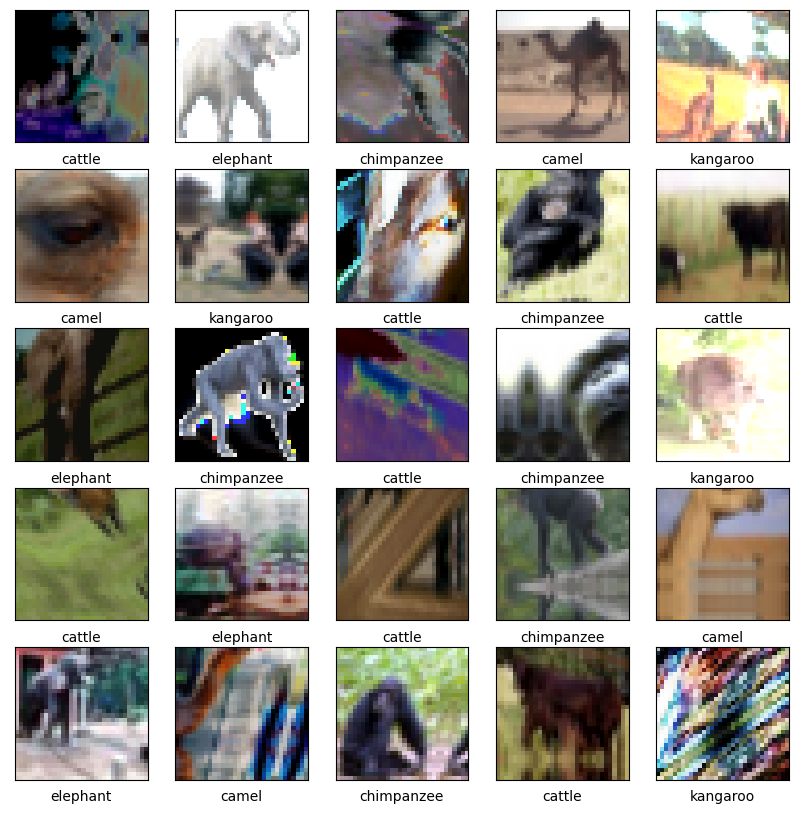

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_training_set[i], cmap=plt.cm.binary)
    plt.xlabel(herbi_omni[np.argmax(augmented_labels[i])])
plt.show()

In [13]:
# Merge original and augmented dataset, and shuffle to ensure randomness
X_train = np.concatenate((X_train, augmented_training_set), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Shuffle the merged dataset to maintain randomness
shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

In [14]:
# Count samples again to see how much the dataset increased by

count_samples()


Number of samples per class in training set: 
camel (0): 1000
cattle (1): 1000
chimpanzee (2): 1000
elephant (3): 1000
kangaroo (4): 1000

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 5000
Total number of test samples: 500


We have now satisfied the minimum 1000 as cited earlier. We can now attempt training.

## **Model Training**
The neural network to be created is a Convolutional Neural Network (CNN). We will be making use of 3 layers of Convolution with Dropout layers in between. There will also be Batch Normalization layers in order to ensure that no weight during gradient descent will be far greater or lesser than others. This also speeds up the model.

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4000, 32, 32, 3)
(1000, 32, 32, 3)
(4000, 5)
(1000, 5)


In [19]:
import keras_tuner as kt
def model_builder(hp):
    hp_units = hp.Int('units_hp', min_value = 16, max_value = 128, step = 32)
    hp_first_filters = hp.Int('first_filter', min_value = 16, max_value = 128, step = 32)
    hp_second_filters = hp.Int('second_filter', min_value = 16, max_value = 128, step = 32)
    hp_third_filters = hp.Int('third_filter', min_value = 16, max_value = 128, step = 32)
    hp_first_dropout = hp.Float('first_dropout', 0, 0.5, step=0.05)
    hp_second_dropout = hp.Float('second_dropout', 0, 0.5, step=0.05)
    hp_third_dropout = hp.Float('third_dropout', 0, 0.5, step=0.05)
    hp_fourth_dropout = hp.Float('fourth_dropout', 0, 0.5, step=0.05)
    model = tf.keras.Sequential([
        layers.Conv2D(filters=hp_first_filters, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=hp_first_filters, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(hp_first_dropout),

        layers.Conv2D(filters=hp_second_filters, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=hp_second_filters, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(hp_second_dropout),

        layers.Conv2D(filters=hp_third_filters, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=hp_third_filters, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(hp_third_dropout),

        layers.Flatten(),
        layers.Dense(hp_units, activation='relu'),
        layers.Dropout(hp_fourth_dropout),
        layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='dir',
                     project_name='hp_tuning_cifar')

tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback])

Trial 254 Complete [00h 07m 28s]
val_accuracy: 0.6725000143051147

Best val_accuracy So Far: 0.6725000143051147
Total elapsed time: 03h 52m 35s


In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'units_hp': 48, 'first_filter': 48, 'second_filter': 80, 'third_filter': 48, 'first_dropout': 0.30000000000000004, 'second_dropout': 0.35000000000000003, 'third_dropout': 0.1, 'fourth_dropout': 0.45, 'tuner/epochs': 100, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [23]:
model = tf.keras.Sequential([
    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.30),

    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),

    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.10),

    layers.Flatten(),
    layers.Dense(48, activation='relu'),
    layers.Dropout(0.45),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = f'highest_performing_model_{dt.datetime.today().strftime("%Y%m%d_%H_%M_%S")}.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)

# Model weights are saved at the end of every epoch, if it's the best seen so far.
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping_callback, 
                                                                                             model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

Epoch 1/100


C:\Users\Desktop PC\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2380 - loss: 1.9565
Epoch 1: val_accuracy improved from -inf to 0.21500, saving model to highest_performing_model_20240223_06_47_27.weights.h5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.2383 - loss: 1.9543 - val_accuracy: 0.2150 - val_loss: 1.7916
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3077 - loss: 1.5081
Epoch 2: val_accuracy did not improve from 0.21500
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.3078 - loss: 1.5081 - val_accuracy: 0.2150 - val_loss: 2.7310
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3467 - loss: 1.5075
Epoch 3: val_accuracy improved from 0.21500 to 0.26600, saving model to highest_performing_model_20240223_06_47_27.weights.h5
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3467 - loss: 1.5074 - val_accuracy: 0.2660 - val_loss: 1.6246
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3829 - loss: 1.4292
Epoch

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       100
           1       0.78      0.51      0.62       100
           2       0.78      0.93      0.85       100
           3       0.67      0.68      0.68       100
           4       0.64      0.75      0.69       100

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.69       500
weighted avg       0.70      0.70      0.69       500



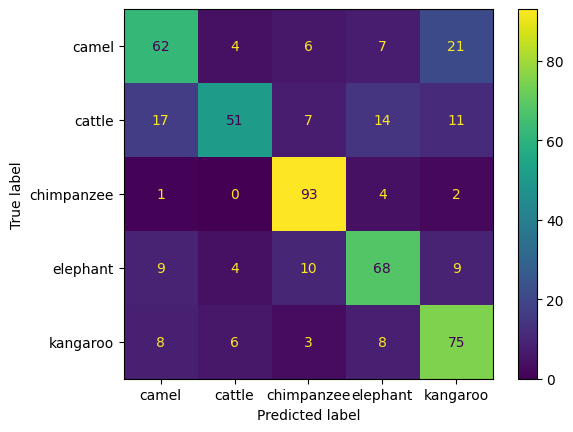

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

y_pred = model.predict(X_test) 
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=herbi_omni)

cm_display.plot()
plt.show()

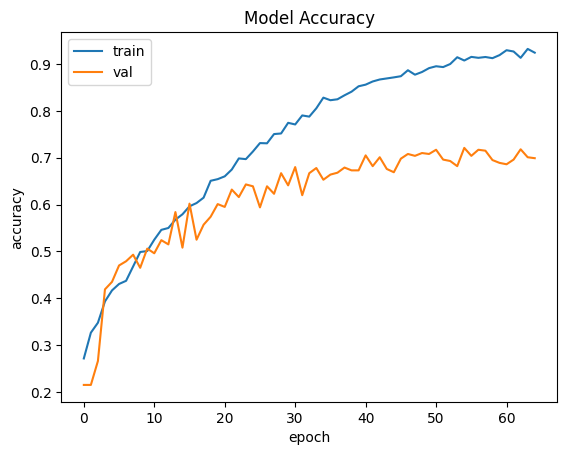

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

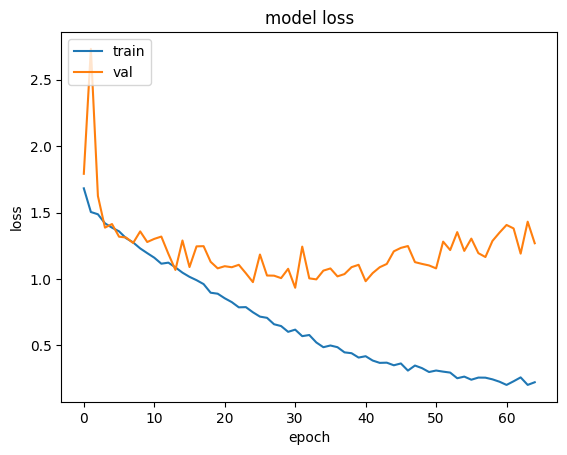

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()